In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
from classifiers.quantum.qasvm import NormQSVM, SoftQASVM
from qiskit.circuit.library import ZZFeatureMap
from classifiers.quantum.ansatz import Circuit9, Circuit1, MultilayerCircuit9FeatureMap
from qiskit.providers.aer import AerSimulator
from qiskit.utils import QuantumInstance
from qiskit import transpile

In [4]:
def my_function(m, n):
    data = np.random.random(size=(2**m, 2**n))
    label = np.where(np.random.random(2**m)>0.5, 1, 0)
    feature_map = MultilayerCircuit9FeatureMap(2**n, 2)
    # feature_map = ZZFeatureMap(feature_dimension=2**n, entanglement='linear')
    var_qc = Circuit1(m, 1, skip_final_rotation_layer=True)
    backend = AerSimulator()
    quantum_instance = QuantumInstance(backend=backend, shots=2**13)
    qasvm = SoftQASVM(data, label, quantum_instance=quantum_instance, var_form=var_qc, feature_map=feature_map, lamda=1.0)
    return transpile(qasvm.second_order_circuit, backend=backend, basis_gates=['rx', 'ry', 'rz', 'cx'], optimization_level=1).depth()

In [5]:
from tqdm.notebook import tqdm
from itertools import product
m = np.arange(2, 9)
n = np.arange(2, 8)
X, Y = np.meshgrid(m, n)
Z = np.empty_like(X)
for i, j in tqdm(list(product(range(len(m)), range(len(n))))):
    Z[j, i] = np.log2(my_function(m[i], n[j]))

  0%|          | 0/42 [00:00<?, ?it/s]

Text(0.5, 0, 'log(depth)')

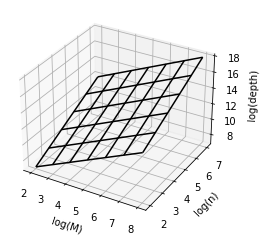

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('log(M)')
ax.set_ylabel('log(n)')
ax.set_zlabel('log(depth)')

In [7]:
from sklearn.linear_model import LinearRegression
XY = np.asarray(list(zip(X.flatten(), Y.flatten())))
ZZ = Z.flatten()
reg = LinearRegression().fit(XY, ZZ, sample_weight=(X.flatten()+Y.flatten()))
print("d = O(2^{:.3f} * M^{:.3f} * n^{:.3f}), R^2={:.3f}".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.score(XY, ZZ)))

d = O(2^3.000 * M^1.000 * n^1.000), R^2=1.000


In [8]:
regx = np.linspace(min(X.flatten()), max(X.flatten()), 10)
regy = np.linspace(min(Y.flatten()), max(Y.flatten()), 10)
regX, regY = np.meshgrid(regx, regy)
regZ = reg.predict(list(zip(regX.flatten(), regY.flatten()))).reshape(regX.shape)

In [9]:
from pathlib import Path

save_dir = Path('./numerical_order_analysis_circ9feature')
save_dir.mkdir(parents=True, exist_ok=True)
np.save(save_dir/'X', X)
np.save(save_dir/'Y', Y)
np.save(save_dir/'Z', Z)
np.save(save_dir/'regX', regX)
np.save(save_dir/'regY', regY)
np.save(save_dir/'regZ', regZ)

<Figure size 432x288 with 0 Axes>

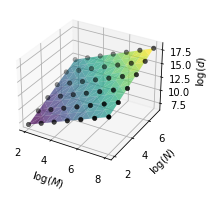

In [10]:
plt.tight_layout()
fig = plt.figure(figsize=(4, 3))
ax = plt.axes(projection='3d')
ax.set_xlabel('$\log(M)$')
ax.set_ylabel('$\log(N)$')
ax.set_zlabel('$\log(d)$')
ax.plot_trisurf(regX.flatten(), regY.flatten(), regZ.flatten(), cmap='viridis', edgecolor='none', alpha=0.7)
ax.scatter(X, Y, Z, color='black', linewidth=0.5)
fig.savefig('./figs/numerical_order_analysis_circ9feature.svg', dpi=300, facecolor='none', edgecolor='none')
fig.savefig('./figs/numerical_order_analysis_circ9feature.png', dpi=300, facecolor='none', edgecolor='none')
fig.savefig('./figs/numerical_order_analysis_circ9feature.pdf', dpi=300, facecolor='none', edgecolor='none')

<Figure size 432x288 with 0 Axes>

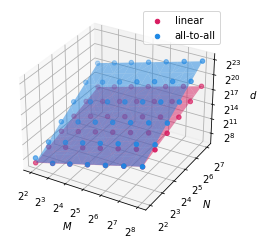

In [75]:
import numpy as np

regX_adhoc = np.load('./numerical_order_analysis_circ9feature/regX.npy')
regY_adhoc = np.load('./numerical_order_analysis_circ9feature/regY.npy')
regZ_adhoc = np.load('./numerical_order_analysis_circ9feature/regZ.npy')

regX_zzline = np.load('./numerical_order_analysis_zzfeatlinear/regX.npy')
regY_zzline = np.load('./numerical_order_analysis_zzfeatlinear/regY.npy')
regZ_zzline = np.load('./numerical_order_analysis_zzfeatlinear/regZ.npy')

regX_zzfull = np.load('./numerical_order_analysis_zzfeatfull/regX.npy')
regY_zzfull = np.load('./numerical_order_analysis_zzfeatfull/regY.npy')
regZ_zzfull = np.load('./numerical_order_analysis_zzfeatfull/regZ.npy')

X_adhoc = np.load('./numerical_order_analysis_circ9feature/X.npy')
Y_adhoc = np.load('./numerical_order_analysis_circ9feature/Y.npy')
Z_adhoc = np.load('./numerical_order_analysis_circ9feature/Z.npy')

X_zzline = np.load('./numerical_order_analysis_zzfeatlinear/X.npy')
Y_zzline = np.load('./numerical_order_analysis_zzfeatlinear/Y.npy')
Z_zzline = np.load('./numerical_order_analysis_zzfeatlinear/Z.npy')

X_zzfull = np.load('./numerical_order_analysis_zzfeatfull/X.npy')
Y_zzfull = np.load('./numerical_order_analysis_zzfeatfull/Y.npy')
Z_zzfull = np.load('./numerical_order_analysis_zzfeatfull/Z.npy')

plt.tight_layout()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('$M$')
ax.set_ylabel('$N$')
ax.set_zlabel('$d$')
ax.plot_trisurf(regX_zzline.flatten(), regY_zzline.flatten(), regZ_zzline.flatten(), edgecolor='none', alpha=0.5, color='#D81B60', facecolor='none')
ax.plot_trisurf(regX_zzfull.flatten(), regY_zzfull.flatten(), regZ_zzfull.flatten(), edgecolor='none', alpha=0.5, color='#1E88E5', facecolor='none')
ax.scatter(X_zzline, Y_zzline, Z_zzline, color='#D81B60', label='linear', linewidth=1)
ax.scatter(X_zzfull, Y_zzfull, Z_zzfull, color='#1E88E5', label='all-to-all', linewidth=1)
ax.legend()
ax.set_xticks(np.arange(np.min(X_zzfull), np.max(X_zzfull)+1))
ax.set_xticklabels(list(map("$2^{:}$".format, np.arange(np.min(X_zzfull), np.max(X_zzfull)+1))))
ax.set_yticks(np.arange(np.min(Y_zzfull), np.max(Y_zzfull)+1))
ax.set_yticklabels(list(map("$2^{:}$".format, np.arange(np.min(Y_zzfull), np.max(Y_zzfull)+1))))
ax.set_zticks(np.arange(np.min(Z_zzfull), np.max(Z_zzfull)+1, 3))
ax.set_zticklabels(list(map("$2^{{{:}}}$".format, np.arange(np.min(Z_zzfull), np.max(Z_zzfull)+1, 3))))
fig.savefig('./figs/numerical_order_analysis.svg', dpi=300, facecolor='none', edgecolor='none')
fig.savefig('./figs/numerical_order_analysis.png', dpi=300, facecolor='none', edgecolor='none')
fig.savefig('./figs/numerical_order_analysis.pdf', dpi=300, facecolor='none', edgecolor='none')